<a href="https://colab.research.google.com/github/mvoir/XSPL/blob/main/spark_shot_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  0.   0.]
 [ 44.   0.]
 [ 41.  39.]
 [ 39.  57.]
 [ 37. -15.]
 [ 36. 109.]
 [  6. 106.]
 [-25. 102.]
 [-24.  -9.]
 [-23.  52.]
 [-22.  41.]
 [-20.   0.]]


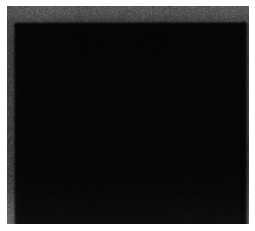

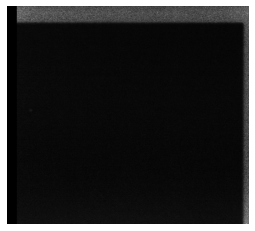

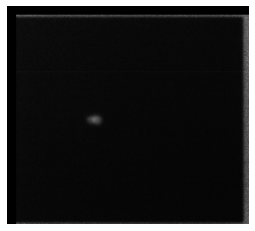

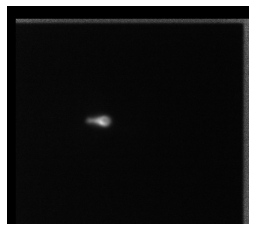

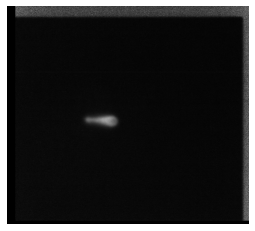

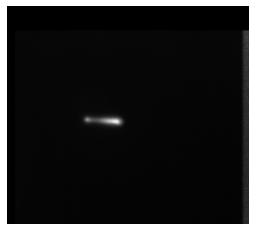

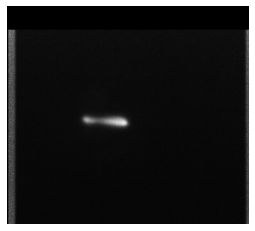

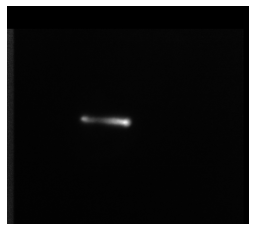

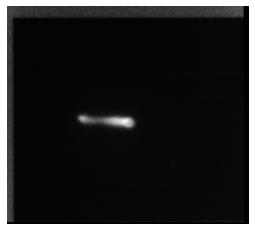

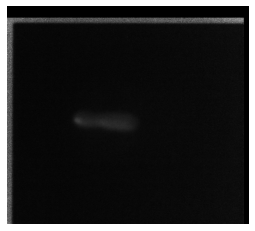

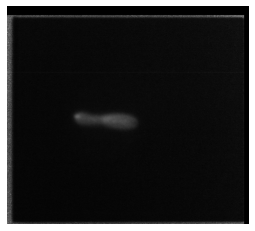

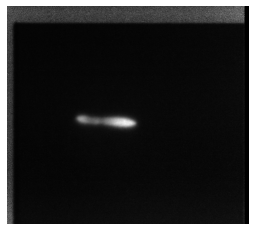

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
import argparse
import imageio #will make gif

displacements = np.genfromtxt("displacements.txt", delimiter=",")
print(displacements)

all_img = np.zeros((12, 974, 1082))
all_imgshift = np.zeros((12, 974, 1082))
fullimg = cv2.imread('spark_shot19.tif', 0)
for i in np.arange(0,12):
  all_img[i, :, :] = fullimg[0+974*i:974*(i+1), :] 
  M = np.float32([[1,0,displacements[i,0]],[0,1,displacements[i,1]]]) #the 0s and the 1s are just to keep an identity matrix
  all_imgshift[i, :,:] = cv2.warpAffine(all_img[i, :,:], M, (all_img[i, :,:].shape[1], all_img[i,:,:].shape[0])) 
  plt.imshow(all_imgshift[i, :,:], cmap = "gray")
  plt.axis("off")
  plt.show()
imageio.mimsave("spark_shot19.gif", all_imgshift.astype(int), duration = 0.2)

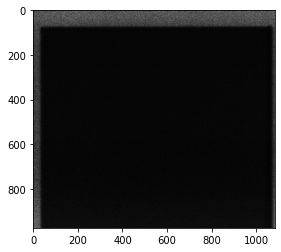

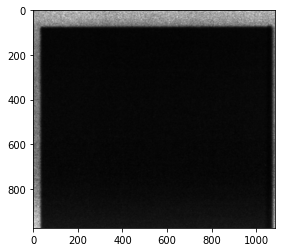

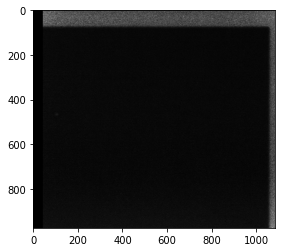

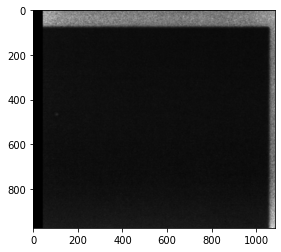

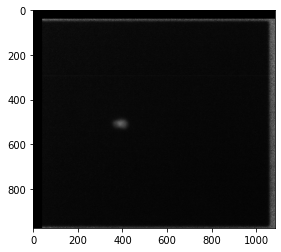

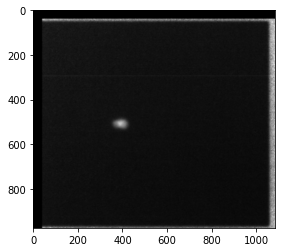

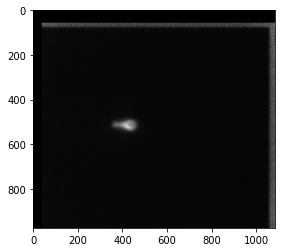

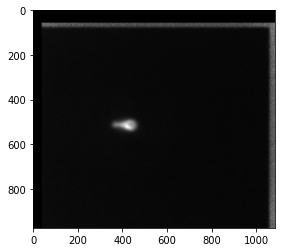

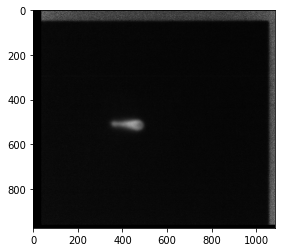

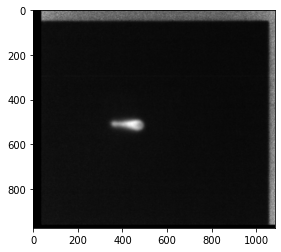

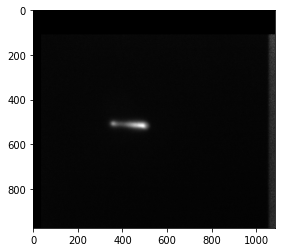

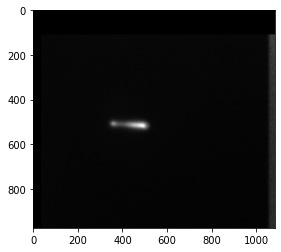

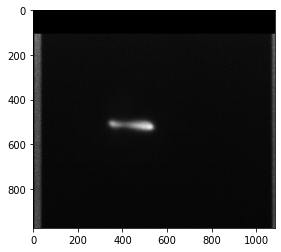

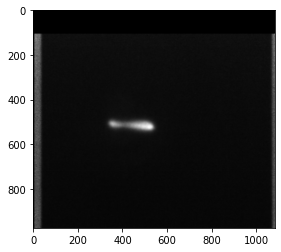

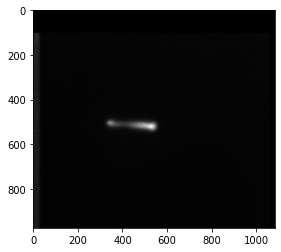

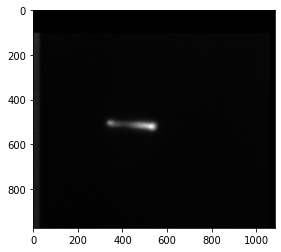

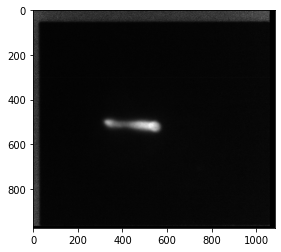

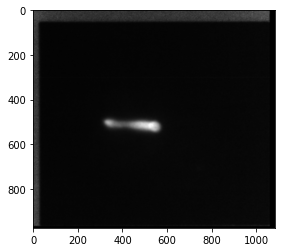

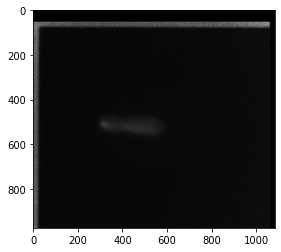

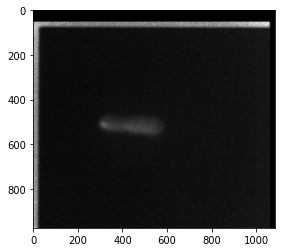

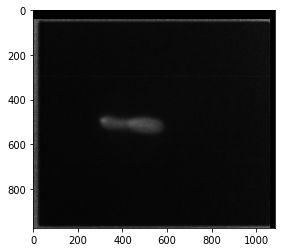

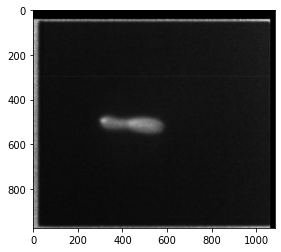

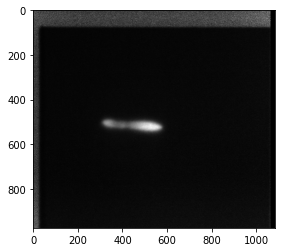

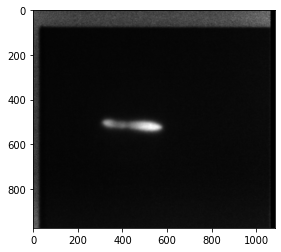

In [ ]:
from scipy.ndimage.filters import gaussian_filter
all_imgblurshift = np.zeros((12,974, 1082))
for i in np.arange(0,12):
  plt.imshow(all_imgshift[i, :,:], cmap = "gray")
  plt.show()
  all_imgblurshift [i,:,:] = gaussian_filter(all_imgshift[i, :, :], 1.5)
  plt.imshow(all_imgblurshift[i, :,:], cmap = "gray")
  plt.show()


(974, 1082)
(974, 1082)
(974, 1082)
Mean is: 2.9359644661380746
Standard Deviation is: 3.6668384641868137
(974, 1082)


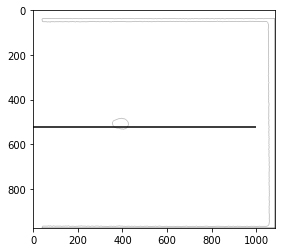

(974, 1082)
[ 61 123]


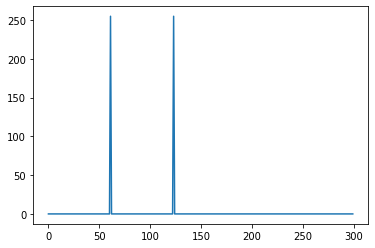

Mean is: 2.1905646627471373
Standard Deviation is: 4.01331760550304
(974, 1082)


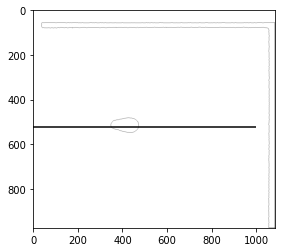

(974, 1082)
[ 49 172]


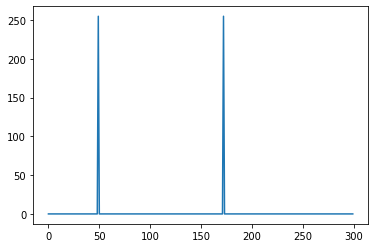

Mean is: 3.1972543050932374
Standard Deviation is: 5.173704317407716
(974, 1082)


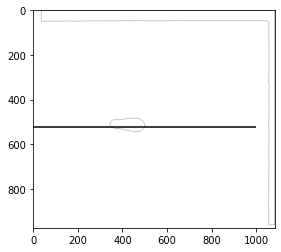

(974, 1082)
[ 50 197]


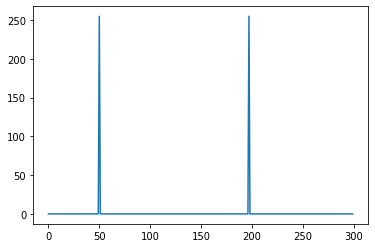

Mean is: 3.449379808476963
Standard Deviation is: 6.0466556342416675
(974, 1082)


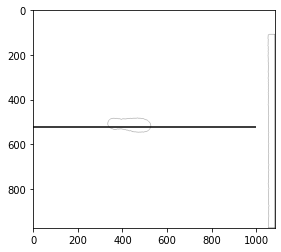

(974, 1082)
[ 38 226]


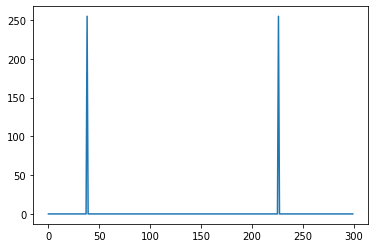

Mean is: 3.4964283952069897
Standard Deviation is: 5.292924418713632
(974, 1082)


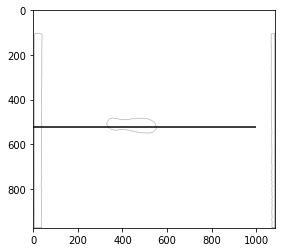

(974, 1082)
[ 35 250]


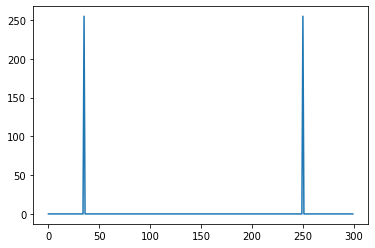

Mean is: 3.856980191067572
Standard Deviation is: 7.9545381495342555
(974, 1082)


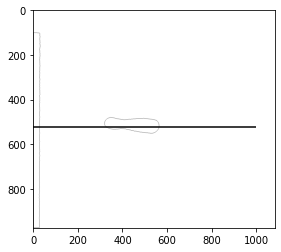

(974, 1082)
[ 25 263]


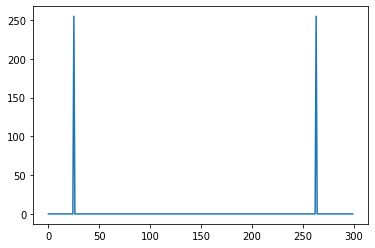

Mean is: 3.7623563861887828
Standard Deviation is: 6.875353228722268
(974, 1082)


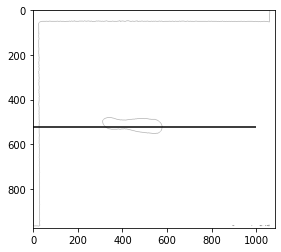

(974, 1082)
[ 22 277]


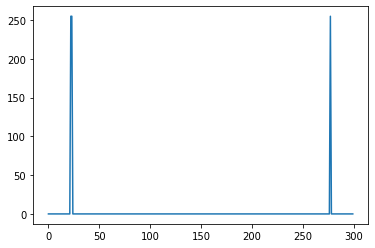

Mean is: 2.217914387760137
Standard Deviation is: 3.6286168023250966
(974, 1082)


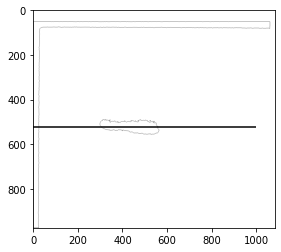

(974, 1082)
[  4 258]


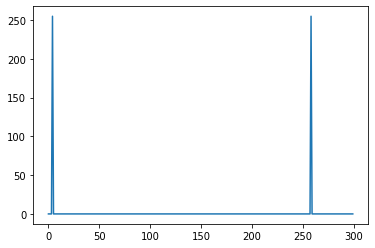

Mean is: 2.7000269483464723
Standard Deviation is: 3.7248124791804202
(974, 1082)


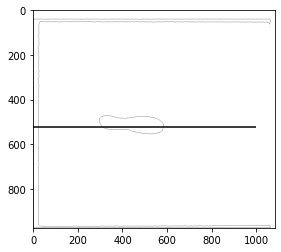

(974, 1082)
[  9 284]


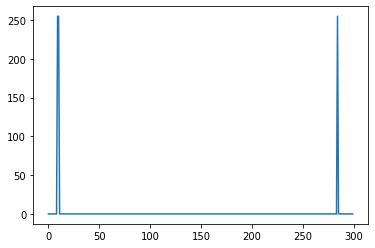

Mean is: 4.871293179031909
Standard Deviation is: 7.507654687696843
(974, 1082)


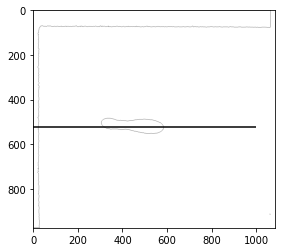

(974, 1082)
[ 15 283]


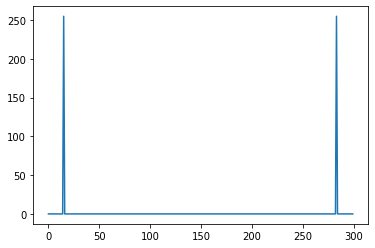

In [ ]:
from PIL import Image
import scipy.signal as s
import seaborn as sns
from matplotlib import colors
x_vals = np.arange(0, 1082, 1)
y_vals = np.arange(0, 974, 1)
X, Y = np.meshgrid(x_vals, y_vals)
print(X.shape)
print(Y.shape)
print(all_imgblurshift[0,:,:].shape)
peaks_arr = np.zeros((12,2))
peaks_diff = np.zeros((12))
for i in np.arange(2,12): #exclude first two empty frames
  mean = np.mean(all_imgblurshift[i, :, :])
  std = np.std(all_imgblurshift[i, :,:])
  print("Mean is:", np.mean(all_imgblurshift[i, :, :]))
  print("Standard Deviation is:", np.std(all_imgblurshift[i, :,:]))
  print(all_imgblurshift[i,:,:].shape)
  all_imgblurshift = all_imgblurshift.astype(np.uint8)
  cmap = colors.ListedColormap([sns.cubehelix_palette(12)[i]])
  plt.imshow(all_imgblurshift[i,:,:], cmap=cmap)
  ret, binary = cv2.threshold(all_imgblurshift[i,:,:], mean+std, 255, cv2.THRESH_BINARY)

  (contours, _) = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  mask = np.ones(all_imgblurshift[i,:,:].shape[:2], dtype="uint8") * 255

  cv2.drawContours(mask, contours, -1, 0)

  plt.imshow(mask, cmap = "gray")

  axis_stacked19 = plt.hlines(520, 0, 1000)
  plt.show()
  print(mask.shape)
  plt.plot(255-mask[520, 300:600])
  peaks, _ = s.find_peaks(-1*mask[520, 300:600], height=0)
  print(peaks)
  peaks_arr[i,:] = peaks
  peaks_diff[i] = peaks_arr[i,1]-peaks_arr[i,0]
  plt.show()

Mean is: 4.467045208697863
Standard Deviation is: 7.163576188946431
(974, 1082)
Mean is: 4.0260582919302985
Standard Deviation is: 5.8804815725594235
(974, 1082)
Mean is: 2.463912937863186
Standard Deviation is: 3.655741588974419
(974, 1082)
Mean is: 2.1905646627471373
Standard Deviation is: 4.01331760550304
(974, 1082)
Mean is: 3.1972543050932374
Standard Deviation is: 5.173704317407716
(974, 1082)
Mean is: 3.449379808476963
Standard Deviation is: 6.0466556342416675
(974, 1082)
Mean is: 3.4964283952069897
Standard Deviation is: 5.292924418713632
(974, 1082)
Mean is: 3.856980191067572
Standard Deviation is: 7.9545381495342555
(974, 1082)
Mean is: 3.7623563861887828
Standard Deviation is: 6.875353228722268
(974, 1082)
Mean is: 2.217914387760137
Standard Deviation is: 3.6286168023250966
(974, 1082)
Mean is: 2.7000269483464723
Standard Deviation is: 3.7248124791804202
(974, 1082)
Mean is: 4.871293179031909
Standard Deviation is: 7.507654687696843
(974, 1082)


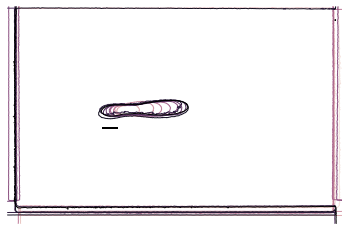

In [ ]:
import seaborn as sns
from matplotlib import colors
fig = plt.figure()
ax = fig.add_subplot(111)
for i in np.arange(0,12):
  mean = np.mean(all_imgblurshift[i, :, :])
  std = np.std(all_imgblurshift[i, :,:])
  print("Mean is:", np.mean(all_imgblurshift[i, :, :]))
  print("Standard Deviation is:", np.std(all_imgblurshift[i, :,:]))
  print(all_imgblurshift[i,:,:].shape)
  ax.contour(X, Y, all_imgblurshift[i,:,:], [mean+std], linewidths=1, cmap = colors.ListedColormap([sns.cubehelix_palette(12, dark = 0, light = 0.9)[i]]))
  mm = plt.hlines(430, 305, 357)
plt.axis("off")
fig.savefig("stacked_contours19.jpg", dpi=368, bbox_inches = "tight", pad_inches=0) # MUST go before plt.show()
plt.show()

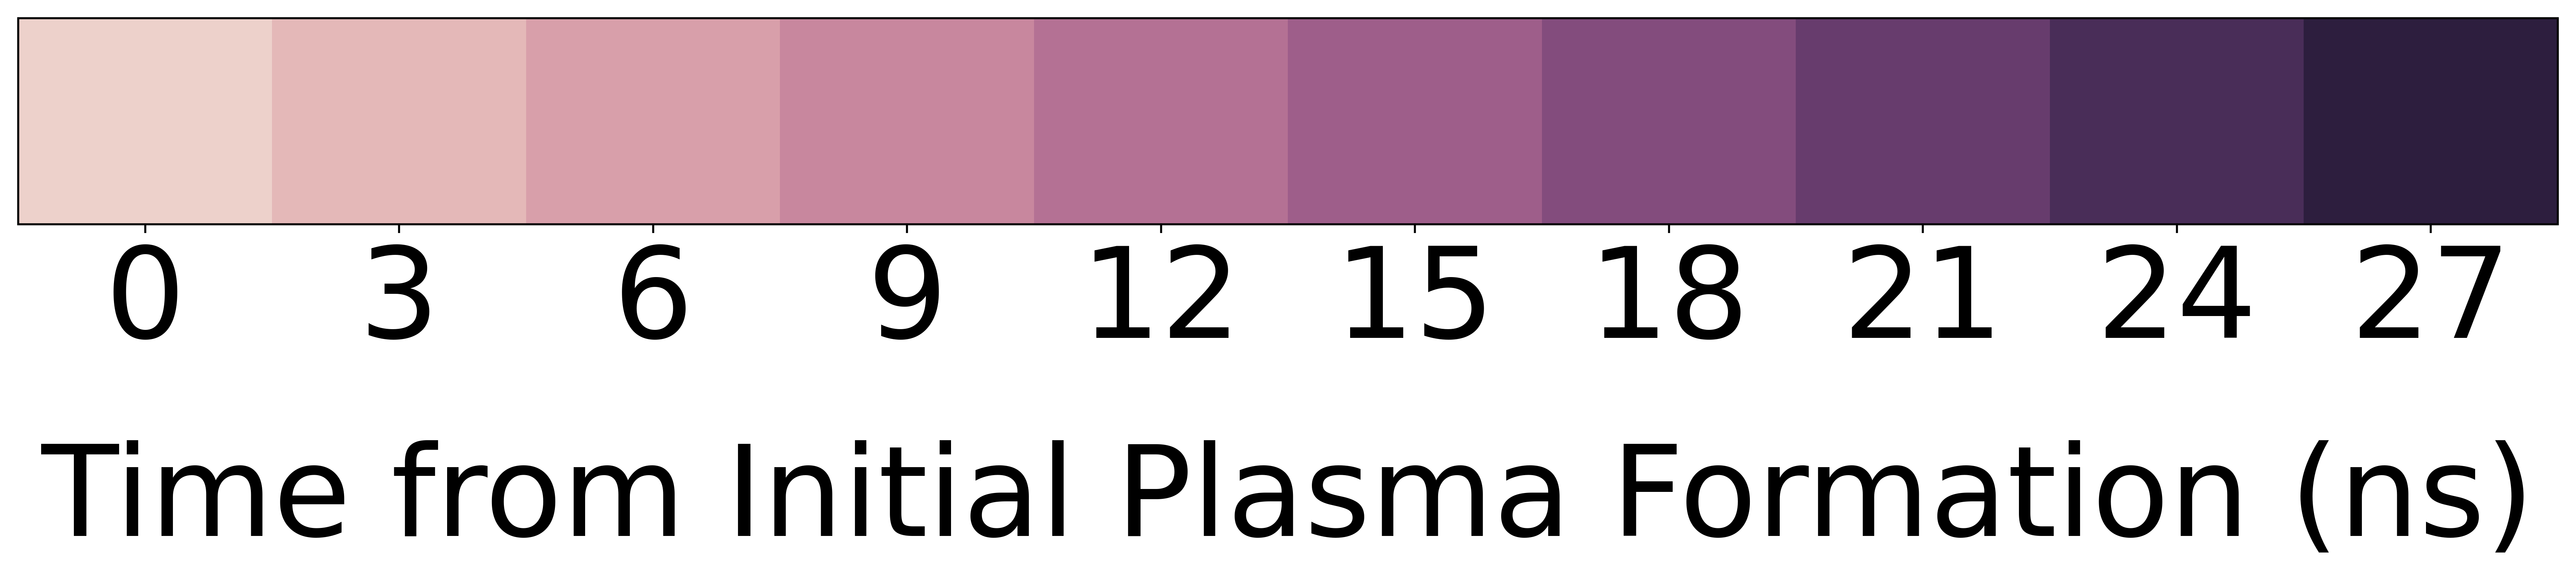

In [ ]:
import matplotlib as mpl

plt.rcParams.update({'font.size': 50, "font.weight":'normal'})

fig, ax = plt.subplots(figsize=(18,1.5), dpi=500)

cmap = mpl.colors.ListedColormap(sns.cubehelix_palette(10))
tick_locs = (np.arange(10) + 0.5)

bounds = list(range(0,11))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds ,
                                extend='neither',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal',
                                )
cb2.set_ticks(tick_locs)

labels = np.array([0,3, 6,  9,   12,   15,   18,   21,  24,  27])

cb2.set_ticklabels(["%.0f" % x for x in labels])
cb2.set_label('Time from Initial Plasma Formation (ns)', labelpad=30, fontsize=50)
fig.savefig("colorbar_full.png", bbox_inches='tight',pad_inches = 0)
plt.show()

In [ ]:
import scipy.signal as s

In [ ]:
print(peaks_diff)

[  0.   0.  62. 123. 147. 188. 215. 238. 255. 254. 275. 268.]


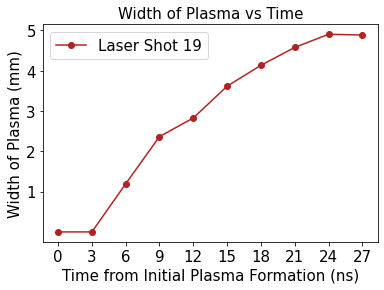

In [ ]:
scaled_diff = np.zeros((10))
for i in np.arange(0,10):
  scaled_diff[i] = peaks_diff[i]*1/52
  time = np.linspace(0, 27, 10)
plt.xticks([0,3, 6,  9,   12,   15,   18,   21,  24,  27], fontsize = 15)
plt.yticks([1,2,3,4,5], fontsize=15)
plt.xlabel("Time from Initial Plasma Formation (ns)", fontsize = 15)
plt.ylabel("Width of Plasma (mm)", fontsize = 15)
plt.title("Width of Plasma vs Time", fontsize = 15)
plt.plot(time, scaled_diff, "-o", color="firebrick", label = "Laser Shot 19")
plt.legend(loc=0, fontsize=15)
plt.savefig("width_vs_time.png", bbox_inches='tight',pad_inches = 0)

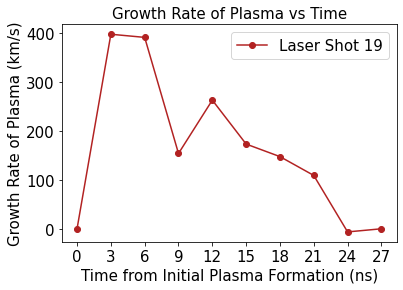

In [ ]:
avg_velocity = np.zeros((10))
width_diff = np.zeros((9))
for i in np.arange(0,9):
  width_diff[i] = scaled_diff[i+1]-scaled_diff[i]
  avg_velocity[i] = (((width_diff[i])/3)/1000000)*10**9
time = np.linspace(0, 27, 10)
plt.xticks([0,3, 6,  9,   12,   15,   18,   21,  24,  27], fontsize = 15)
plt.yticks(np.linspace(0,400,5), fontsize=15)
plt.xlabel("Time from Initial Plasma Formation (ns)", fontsize = 15)
plt.ylabel("Growth Rate of Plasma (km/s)", fontsize = 15)
plt.title("Growth Rate of Plasma vs Time", fontsize = 15)
plt.plot(time, avg_velocity, "-o", color = "firebrick", label = "Laser Shot 19")
plt.legend(loc=1, fontsize=15)
plt.savefig("velocity_vs_time.png", bbox_inches='tight',pad_inches = 0)